In [5]:
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

import ase
from ase.io import read
from ase.build import surface, make_supercell, bulk
from ase.visualize import view
from sim.model import save_cell_for_prismatic

In [2]:
import os

In [3]:
os.chdir(r'Y:\Collaboration\Oslo\Phuong MgSi Bi\Simulations')

In [4]:
def cell2sig(cell, pixel_size = 0.05, sigma=0.25):
    Signal2D = hs.signals.Signal2D
    Gaussian2D = hs.model.components2D.Gaussian2D


    XLEN, YLEN = (cell.cell.diagonal()[:2] // pixel_size).astype(int)
    ax0 = {
        'name':'y',
        'size': YLEN,
        'offset':0,
        'scale':pixel_size, 
        'units':'Å',
    }
    ax1 = {
        'name':'x', 
        'size': XLEN, 
        'offset':0,
        'scale':pixel_size, 
        'units':'Å',
    }

    axes = [ax0, ax1]
    s = Signal2D(np.zeros((YLEN, XLEN)), axes=axes)

    m = s.create_model()

    # Add equivalent unit cells around the image, so that any gaussians that extend into the image, do so.

    shifts = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]

    cell_center = np.array([(ax.high_value + ax.scale + ax.low_value)/2 for ax in s.axes_manager.signal_axes])
    diagonal_radius = np.array([ax.high_value for ax in s.axes_manager.signal_axes])

    for atom in cell:
        for offset in shifts:
            xyposition = atom.position[:2] + cell.cell.diagonal()[:2] * offset
            if np.abs(np.linalg.norm(xyposition - cell_center)) > np.linalg.norm(cell_center - diagonal_radius) + 1:
                continue
            A = atom.number**2
            x, y = xyposition
            g = Gaussian2D(A, sigma, sigma, x, y )
            m.append(g)
    s2 = m.as_signal()
    return s2

In [19]:
cell = read('Mg2Si_For_Phuong.cif')

cells = []
#sigs = []
for n in range(1,15):
    cell2 = surface(cell, (0,0,1), n, vacuum=2,).repeat((3,3,1))
    centre = (9.516, 9.516)
    left = (6.344, 9.516)
    
    pos = cell2.positions
    low = np.where(np.linalg.norm(pos[:,:2] - centre, axis=-1) < 0.1)
    index_center = low[0][np.argmin(pos[low][:,2])]

    #low = np.where(np.linalg.norm(pos[:,:2] - left, axis=-1) < 0.1)
    #index_left = low[0][np.argmin(pos[low][:,2])]

    cell2[index_center].number = 83
    cells.append(cell2)
    save_cell_for_prismatic(cell2, 'cells\\n{:02d}.xyz'.format(n))
    #sigs.append(cell2sig(cell2))

In [15]:
"{:02d}".format(-2)

'-2'

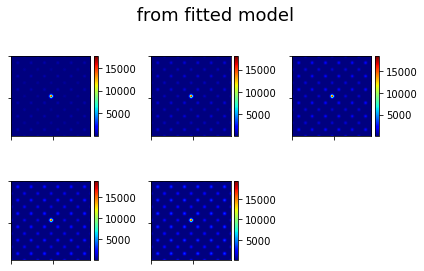

In [236]:
hs.plot.plot_images(sigs, axes_decor=None, cmap='jet')
plt.tight_layout()

In [196]:
save_cell_for_prismatic(cells[-1], 'size5')

In [187]:
sigs = []
for n in range(1,6):
    cell = surface(cell, (0,0,1), n, vacuum=2,)
    sigs.append(cell2sig(cell))

In [192]:
[s.data.max() for s in sigs]

[732.6632448802198,
 1465.3264897604397,
 2197.9897346406597,
 2930.65297952088,
 3663.3162244011]

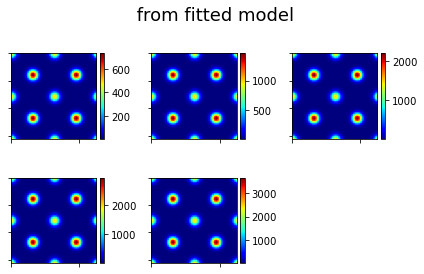

In [169]:
from sim.model import save_cell_for_prismatic

In [170]:
save_cell_for_prismatic(surf, 'test')

In [174]:
view(surf)

In [134]:
cell = bulk('Cu', 'fcc',cubic=True)
surf = surface(cell, (1,1,1), 3, vacuum=0, periodic=True)
bulk = surf.repeat(3)
bulk.write('bulk.cif')
view(bulk)

In [ ]:
view(surf)

In [165]:
cell = read('Mg2Si_For_Phuong.cif')
surf = surface(cell, (1,1,1), 1, vacuum=0, periodic=True)
#cell.rotate((0,0,1), (1,1,1), rotate_cell=True)
view(surf)

In [154]:
cell = bulk('Cu', 'fcc',cubic=True)
for layers in range(5):
    surf = surface(cell, (1,1,1), layers, vacuum=0)
    surf.write(str(layers) + '.cif')
    print(str(layers) + '.cif')
    view(surf)
#large = surf.repeat(3)


0.cif
1.cif
2.cif
3.cif
4.cif


In [126]:
a = surface(cell, (1,1,1), 3, vacuum=0, periodic=True)

In [127]:
from ase.build import niggli_reduce

In [128]:
niggli_reduce(a)

In [131]:
view(a.repeat(3))

In [105]:
atoms

Atoms(symbols='Cu', pbc=[True, True, False], cell=[2.2627416997969525, 2.2627416997969525, 0.0], tags=...)

In [33]:
view(surface(cell, (1,1,1), 1, vacuum=0, periodic=True).repeat(3))

In [44]:
view(surface("Si", (1,1,1), 3, vacuum=0, periodic=True).repeat(2))

In [41]:
view(surface(cell, (1,1,1), 2, vacuum=0, periodic=True).repeat(2))

In [91]:
cell = bulk('Cu', 'fcc',cubic=True)
cell.write('testcell.cif')

In [106]:

from ase.build import fcc100

atoms = fcc100(symbol='Cu', size=(1, 1, 1),
    a=3.2, vacuum=None, orthogonal=True).repeat((4,4,1))

In [107]:
view(atoms)

In [155]:
from ase.build import bulk
cell = bulk('Cu', 'fcc',cubic=True)
surf = surface(cell, (1,1,1), 3,).repeat((3,3,1))
view(surf)

cell2 = bulk('Cu', 'fcc', cubic=True)
cell2 = cell2.repeat(3)
cell2.rotate((1,1,1), (0,0,1),)
view(cell2)


In [120]:
surf

Atoms(symbols='Cu36', pbc=[True, True, False], cell=[[15.31593288050062, 0.0, 0.0], [7.657966440250309, 13.26398695717091, 0.0], [0.0, 0.0, 0.0]])

In [123]:
surf = surface(cell, (1,1,1), 1, periodic=True)
surf
view(surf)

In [110]:
surf.write('surf.cif')
cell2.write('cell2.cif')

In [73]:

view(cell.repeat(3))